In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line, geom_bar, ggtitle

1-	How much does the oil exports add to the Saudi economy?
- Oil exports from 2011 - 2020 is %81 of total exports (SAR 8,521,187 x m).
- Non-Oil exports from 2011 - 2020 is (SAR 2,017,061 x m)
- A big drop of oil exports after 2014

In [3]:
# sheet 1.1: non-oil exports - oil exports
Trading_Oil_non_Oil= pd.read_csv('Cleaned_data/Trading20_1-1_clean.csv')
Trading_Oil_non_Oil.drop('Unnamed: 0', axis=1, inplace=True)
# also
# Exports_commodityGroup['value in Millions'].sum() - tot_oil_ex_20['value in Millions'].sum()

In [4]:
Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'].round(3).to_frame()

,Oil Exports Value(Millions SAR)
0,1191052.099
1,1265550.610
2,1207080.084
3,1067091.642
4,573411.985
5,510729.487
6,638402.283
7,868442.402
8,751828.129
9,447599.225


In [5]:
Trading_Oil_non_Oil['Total exports'] = Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'] + Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)']

In [6]:
Trading_Oil_non_Oil.round(3)

,Year,Oil Exports Value(Millions SAR),Oil Percentage of Total Exports,Non-oil Exports Value(millions SAR),Non-oil Percentage of Total Exports,Total exports
0,2011.0,1191052.099,87.089,176567.732,12.911,1367619.831
1,2012.0,1265550.610,86.890,190951.554,13.110,1456502.163
2,2013.0,1207080.084,85.637,202443.213,14.363,1409523.297
3,2014.0,1067091.642,83.099,217029.904,16.901,1284121.546
4,2015.0,573411.985,75.121,189901.078,24.879,763313.063
5,2016.0,510729.487,74.188,177693.532,25.812,688423.019
6,2017.0,638402.283,76.742,193479.004,23.258,831881.288
7,2018.0,868442.402,78.670,235458.084,21.330,1103900.486
8,2019.0,751828.129,76.638,229184.235,23.362,981012.363
9,2020.0,447599.225,68.655,204352.737,31.345,651951.963


In [198]:
751828.129/772750.031

0.9729253948098515

In [7]:
Trading_Oil_non_Oil.to_csv('Cleaned_data/Trading20_1-1_clean.csv')

### Overall value of exports has been decreasing after 2014

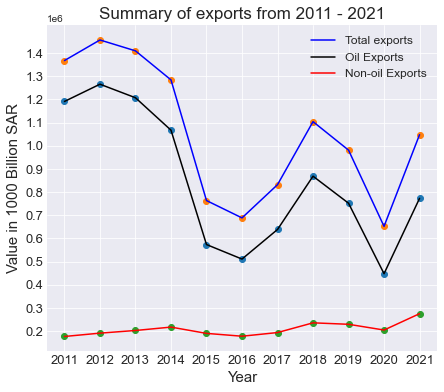

<Figure size 432x288 with 0 Axes>

In [138]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = [7,6])
plt.scatter(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'])
plt.scatter(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Total exports'])
plt.scatter(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'])
plt.plot(Trading_Oil_non_Oil[['Year']], Trading_Oil_non_Oil[['Total exports']], c='blue', label='Total exports')
plt.plot(Trading_Oil_non_Oil[['Year']], Trading_Oil_non_Oil[['Oil Exports Value(Millions SAR)']], c='black', label='Oil Exports')
plt.plot(Trading_Oil_non_Oil[['Year']], Trading_Oil_non_Oil[['Non-oil Exports Value(millions SAR)']], c='red', label='Non-oil Exports')
plt.xlabel('Year',fontsize= 15)
plt.xticks(np.arange(2011, 2022, 1), fontsize= 13)
plt.yticks(np.arange(200000, 1500000, 100000), fontsize= 13)
plt.ylabel('Value in 1000 Billion SAR', fontsize= 15)
plt.legend(fontsize= 12)
plt.title("Summary of exports from 2011 - 2021",fontsize= 17 )
plt.show()
plt.savefig('Plots/Summary of exports from 2011 - 2021.png')

In [9]:

Trading_Oil_non_Oil['Total exports']= (Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'] + Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)']).round(3)
Trading_Oil_non_Oil['Total exports'].to_frame()

,Total exports
0,1367619.831
1,1456502.163
2,1409523.297
3,1284121.546
4,763313.063
5,688423.019
6,831881.288
7,1103900.486
8,981012.363
9,651951.963


In [10]:

Trading_Oil_non_Oil.groupby(['Year', 'Total exports'])['Total exports'].aggregate(['max']).round(2)

,,max
Year,Total exports,
2011.0,1367619.831,1367619.83
2012.0,1456502.163,1456502.16
2013.0,1409523.297,1409523.30
2014.0,1284121.546,1284121.55
2015.0,763313.063,763313.06
2016.0,688423.019,688423.02
2017.0,831881.288,831881.29
2018.0,1103900.486,1103900.49
2019.0,981012.363,981012.36


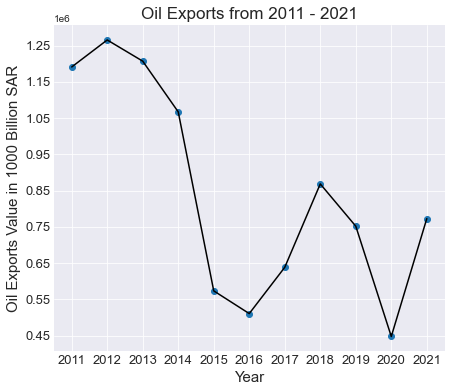

<Figure size 432x288 with 0 Axes>

In [135]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = [7,6])
plt.scatter(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'].round())
plt.plot(Trading_Oil_non_Oil[['Year']], Trading_Oil_non_Oil[['Oil Exports Value(Millions SAR)']], c='black', label='Oil Exports')
plt.xlabel('Year',fontsize= 15)
plt.xticks(np.arange(2011, 2022, 1), fontsize= 13)
plt.yticks(np.arange(450000, 1300000, 100000), fontsize= 13)
plt.ylabel('Oil Exports Value in 1000 Billion SAR', fontsize= 15)
plt.title("Oil Exports from 2011 - 2021",fontsize= 17 )
plt.show()
plt.savefig('Oil Exports exports from 2011 - 2021.png')

Total value of oil exports in millions SAR:

In [12]:

(Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'].sum()).round(3)

9293937.978

Value of overall oil exports percentage: 

In [13]:

(Trading_Oil_non_Oil['Oil Exports Value(Millions SAR)'].sum() / Trading_Oil_non_Oil['Total exports'].sum()).round(3)

0.802

Total value of non-oil exports in millions SAR:

In [14]:

Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'].sum().round(3)

2291961.372

### Statistical summary:

In [197]:

Trading_Oil_non_Oil.describe()

,Year,Oil Exports Value(Millions SAR),Oil Percentage of Total Exports,Non-oil Exports Value(millions SAR),Non-oil Percentage of Total Exports,Total exports
count,11.000000,1.100000e+01,11.000000,11.000000,11.000000,1.100000e+01
mean,2016.000000,8.449035e+05,77.923721,208360.124698,22.076279,1.053264e+06
std,3.316625,2.962430e+05,7.376192,29220.216612,7.376192,2.960903e+05
min,2011.000000,4.475992e+05,64.430000,176567.731649,12.910586,6.519520e+05
25%,2013.500000,6.059071e+05,74.654896,190426.315538,15.631786,7.975972e+05
50%,2016.000000,7.727500e+05,76.741993,202443.212959,23.258007,1.047650e+06
75%,2018.500000,1.129072e+06,84.368214,223107.069110,25.345104,1.325871e+06
max,2021.000000,1.265551e+06,87.089414,274900.300000,35.570000,1.456502e+06


2-	Are the non-oil exports increasing? 
- Yes, from 2018
- Mean= 201,706 
- Since 2018, value has increased

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


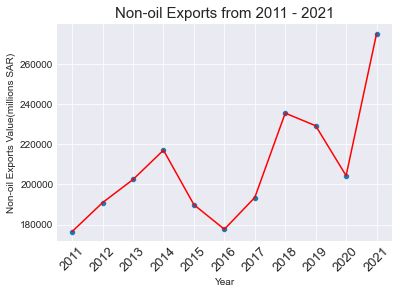

<Figure size 720x1080 with 0 Axes>

In [146]:

sns.scatterplot(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'])
sns.lineplot(Trading_Oil_non_Oil['Year'], Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'], color='red')
plt.title('Non-oil Exports from 2011 - 2021', fontsize= 15)
plt.xticks(np.arange(2011, 2022, 1), fontsize= 13, rotation=45)
plt.figure(figsize = [10,15])
plt.show()

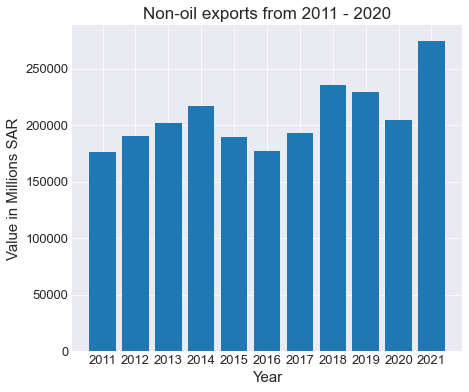

In [153]:

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = [7,6])
plt.bar(Trading_Oil_non_Oil['Year'] , Trading_Oil_non_Oil['Non-oil Exports Value(millions SAR)'])
plt.xlabel('Year',fontsize= 15)
plt.xticks(np.arange(2011, 2022, 1),fontsize= 13)
plt.yticks(fontsize= 13)
plt.ylabel('Value in Millions SAR', fontsize= 15)
plt.title("Non-oil exports from 2011 - 2020",fontsize= 17 )
plt.savefig('Plots/Non-oil exports from 2011 - 2020.png')
plt.show()


3-	How much is the effect of COVID-19 on the Saudi imports & export?

In [18]:
# any big drop/decrease in 2020 & 2021 compared to 2019? 


If yes, What are the main areas that got affected? 

4-	How much did the Saudi import & export change from 2011 to 2020?

In [19]:
# sheet 1-3, compare imports vs exports

6-	What does Saudi export the most? Such as dates, cooking oil, used cars, used clothes?

In [20]:
# sheet 1.2
# sheet 3-7


7-	What does Saudi import the most? Such as new cars, new clothes, medicine, medical equipment (Masks during covid), etc.

In [21]:
# sheet 3-4
# sheet 2-1

8-	How much has Saudi been importing & exporting in petrochemicals, medicine, car parts, and vegetables?

In [22]:
# umm, answer after answering above questions

9-	What are the things that Saudi is planning to produce to lower their dependency on importing? military equipment, cars (electric), etc. 

### Top exports from 2018 - 2021

In [23]:
Exports_bysection18_20= pd.read_csv('Cleaned_data/Trading20_1-2_clean.csv')
Tot_21_Exports= pd.read_csv('Cleaned_data/Tot_21_Exports.csv')

In [24]:
Max_Ex = (Exports_bysection18_20['2018 Value(millions in SAR)'], Exports_bysection18_20['2019 Value(millions in SAR)'], 
Exports_bysection18_20['2020 Value(millions in SAR)'], Tot_21_Exports['Value(millions SAR)'], Exports_bysection18_20['Section Description'])
 

In [25]:
#Max_Ex_18_21 = pd.DataFrame(data=Max_Ex)

#Max_Ex_18_21

In [26]:
totNum_21_Exports= pd.read_csv('Cleaned_data/totNum_21_Exports.csv')
totNum_21_Exports.drop('Unnamed: 0', axis=1, inplace=True)
totNum_21_Exports

,Tot_21_Exports
0,5371.480
1,1875.749
2,1448.004
3,6904.443
4,777265.181
5,84049.278
6,91028.617
7,213.346
8,493.542
9,2760.183


In [27]:
Exports_bysection18_20.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
Exports_bysection18_20['2021 Value(millions in SAR)'] = totNum_21_Exports['Tot_21_Exports']

In [39]:
Exports_bysection18_20.loc[0,'Section Description'] = 'Live animals & its products'
Exports_bysection18_20.loc[1,'Section Description'] = 'Vegetable products'
Exports_bysection18_20.loc[2,'Section Description'] = 'Animal/vegetable fats & oils'
Exports_bysection18_20.loc[3,'Section Description'] = 'Prepared foodstuffs'
Exports_bysection18_20.loc[4,'Section Description'] = 'Mineral products'
Exports_bysection18_20.loc[5,'Section Description'] = 'Chemical/allied industries'
Exports_bysection18_20.loc[6,'Section Description'] = 'Plastics & related articles'
Exports_bysection18_20.loc[7,'Section Description'] = 'Raw hides, skins, leather, etc'
Exports_bysection18_20.loc[8,'Section Description'] = 'Wood & charcoal'
Exports_bysection18_20.loc[9,'Section Description'] = 'paper, paperboard,related articles'
Exports_bysection18_20.loc[10,'Section Description'] = 'Textiles & textile articles'
Exports_bysection18_20.loc[11,'Section Description'] = 'Footwear, headgear, umbrellas, etc'
Exports_bysection18_20.loc[12,'Section Description'] = 'Articles of stone, plaster, cement'
Exports_bysection18_20.loc[13,'Section Description'] = 'Natural or cultured pearls'
Exports_bysection18_20.loc[14,'Section Description'] = 'Base metals & related articles'
Exports_bysection18_20.loc[15,'Section Description'] = 'Machinery & mechanical appliances'
Exports_bysection18_20.loc[16,'Section Description'] = 'Vehicles, aircraft, vessels, etc'
Exports_bysection18_20.loc[17,'Section Description'] = 'Optical, photographic, cinematographic'
Exports_bysection18_20.loc[18,'Section Description'] = 'Arms, ammunition parts, accessories'
Exports_bysection18_20.loc[19,'Section Description'] = 'Miscellaneous manufactured articles'
Exports_bysection18_20.loc[20,'Section Description'] = 'Works of art, collectors pieces & antiques'

In [40]:
Exports_bysection18_20

,2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),Section Description,Section Number,2021 Value(millions in SAR)
0,6057.512578,5687.233568,5368.675468,Live animals & its products,1,5371.480
1,1440.949608,1563.584641,1634.052079,Vegetable products,2,1875.749
2,819.818876,849.966497,861.608808,Animal/vegetable fats & oils,3,1448.004
3,5470.373403,5782.133899,5846.126337,Prepared foodstuffs,4,6904.443
4,872029.853072,754960.758584,451092.776040,Mineral products,5,777265.181
5,75455.289785,69551.508281,57873.453738,Chemical/allied industries,6,84049.278
6,79667.031342,72833.580298,62728.867805,Plastics & related articles,7,91028.617
7,270.407456,280.720176,169.362314,"Raw hides, skins, leather, etc",8,213.346
8,311.069498,364.556581,253.464176,Wood & charcoal,9,493.542
9,2777.208284,2556.065300,2482.395784,"paper, paperboard,related articles",10,2760.183


In [79]:
777265.181
Exports_bysection18_20['2021 Value(millions in SAR)'].sum()


1047575.509

In [41]:
Max_Exports_18_21 = Exports_bysection18_20.groupby(['2018 Value(millions in SAR)', '2019 Value(millions in SAR)', 
'2020 Value(millions in SAR)', '2021 Value(millions in SAR)'])['Section Description'].aggregate(["max"])
Max_Exports_18_21.sort_values("2021 Value(millions in SAR)",ascending=False)


,,,,max
2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),2021 Value(millions in SAR),
872029.853072,754960.758584,451092.776040,777265.181,Mineral products
79667.031342,72833.580298,62728.867805,91028.617,Plastics & related articles
75455.289785,69551.508281,57873.453738,84049.278,Chemical/allied industries
15380.588908,22605.252704,19474.193307,22933.852,"Vehicles, aircraft, vessels, etc"
20645.345694,16868.946345,16401.029776,22373.225,Base metals & related articles
11901.193786,12103.530969,10966.047606,14855.206,Machinery & mechanical appliances
5470.373403,5782.133899,5846.126337,6904.443,Prepared foodstuffs
3613.703033,5739.889889,8554.909788,5816.817,Natural or cultured pearls
6057.512578,5687.233568,5368.675468,5371.480,Live animals & its products


In [105]:
Max5_Exports_18_21= (Exports_bysection18_20.sort_values("2021 Value(millions in SAR)",ascending=False)).head()
Max5_Exports_18_21

,2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),Section Description,Section Number,2021 Value(millions in SAR)
4,872029.853072,754960.758584,451092.776040,Mineral products,5,777265.181
6,79667.031342,72833.580298,62728.867805,Plastics & related articles,7,91028.617
5,75455.289785,69551.508281,57873.453738,Chemical/allied industries,6,84049.278
16,15380.588908,22605.252704,19474.193307,"Vehicles, aircraft, vessels, etc",17,22933.852
14,20645.345694,16868.946345,16401.029776,Base metals & related articles,15,22373.225


In [194]:
# drop in 2020:
69551.508281/84049.278

0.8275086941377414

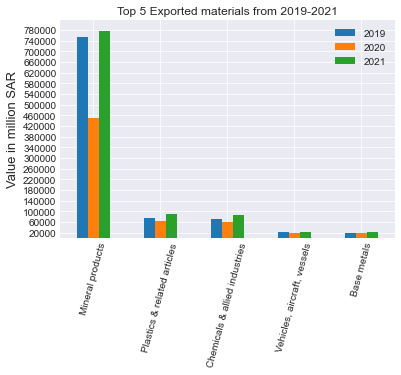

In [186]:

plotdata=Max5_Exports_18_21[['2019 Value(millions in SAR)', '2020 Value(millions in SAR)', '2021 Value(millions in SAR)']]
plotdata.plot(kind="bar")
plt.title("Top 5 Exported materials from 2019-2021")
plt.xticks([0, 1, 2, 3, 4], ['Mineral products', 'Plastics & related articles', 'Chemicals & allied industries','Vehicles, aircraft, vessels', 'Base metals'], rotation=75)
plt.yticks(np.arange(20000, 800000, 40000), fontsize= 10)
plt.legend(labels=( '2019', '2020', '2021'))
plt.ylabel("Value in million SAR", fontsize= 13)

plt.savefig('Plots/Top 5 Exported materials from 2019-2021.png')
plt.show()

### Top Imports from 2018 - 2021

In [86]:
Imports_bysection= pd.read_csv("Cleaned_data/Trading20_2-1_clean.csv")
Imports_bysection.drop('Unnamed: 0', axis=1, inplace=True)
Imports_bysection

,2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),Section Description,Section Number
0,18095.450548,19507.619134,19013.048509,Live animals; animal products,1
1,32996.027181,31123.980544,34922.104079,Vegetable products,2
2,3521.849209,3338.453922,3363.130944,Animal or vegetable fats and oils and their cl...,3
3,25635.233829,27399.318015,28417.779143,"Prepared foodstuffs; beverages, spirits and vi...",4
4,21090.437514,18021.236913,18612.873864,Mineral products,5
5,51715.771619,53854.494181,53404.397121,Products of the chemical or allied industries,6
6,17486.718316,20567.953322,19462.287220,Plastics and articles thereof; rubber and arti...,7
7,1872.681936,2295.584415,1650.055971,"Raw hides and skins, leather, furskins and art...",8
8,4271.516713,4750.736646,5169.182124,Wood and articles of wood; wood charcoal; cork...,9
9,7260.801908,7150.673740,6547.644869,Pulp of wood or of other fibrous cellulosic ma...,10


In [82]:
Tot_21_Imports= pd.read_csv('Cleaned_data/tot_21_imports.csv')

In [87]:
Imports_bysection['2021 Value(millions in SAR)'] = Tot_21_Imports['Value(millions SAR)']
Imports_bysection

,2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),Section Description,Section Number,2021 Value(millions in SAR)
0,18095.450548,19507.619134,19013.048509,Live animals; animal products,1,19001.093
1,32996.027181,31123.980544,34922.104079,Vegetable products,2,32737.383
2,3521.849209,3338.453922,3363.130944,Animal or vegetable fats and oils and their cl...,3,4262.998
3,25635.233829,27399.318015,28417.779143,"Prepared foodstuffs; beverages, spirits and vi...",4,28601.617
4,21090.437514,18021.236913,18612.873864,Mineral products,5,28683.826
5,51715.771619,53854.494181,53404.397121,Products of the chemical or allied industries,6,60378.494
6,17486.718316,20567.953322,19462.287220,Plastics and articles thereof; rubber and arti...,7,21745.130
7,1872.681936,2295.584415,1650.055971,"Raw hides and skins, leather, furskins and art...",8,1746.679
8,4271.516713,4750.736646,5169.182124,Wood and articles of wood; wood charcoal; cork...,9,5668.442
9,7260.801908,7150.673740,6547.644869,Pulp of wood or of other fibrous cellulosic ma...,10,6890.310


In [88]:
Imports_bysection18_21= pd.DataFrame(Imports_bysection)

In [95]:
Imports_bysection18_21.loc[0,'Section Description'] = 'Live animals & its products'
Imports_bysection18_21.loc[1,'Section Description'] = 'Vegetable products'
Imports_bysection18_21.loc[2,'Section Description'] = 'Animal/vegetable fats & oils'
Imports_bysection18_21.loc[3,'Section Description'] = 'Prepared foodstuffs'
Imports_bysection18_21.loc[4,'Section Description'] = 'Mineral products'
Imports_bysection18_21.loc[5,'Section Description'] = 'Chemical/allied industries'
Imports_bysection18_21.loc[6,'Section Description'] = 'Plastics & related articles'
Imports_bysection18_21.loc[7,'Section Description'] = 'Raw hides, skins, leather, etc'
Imports_bysection18_21.loc[8,'Section Description'] = 'Wood & charcoal'
Imports_bysection18_21.loc[9,'Section Description'] = 'paper, paperboard,related articles'
Imports_bysection18_21.loc[10,'Section Description'] = 'Textiles & textile articles'
Imports_bysection18_21.loc[11,'Section Description'] = 'Footwear, headgear, umbrellas, etc'
Imports_bysection18_21.loc[12,'Section Description'] = 'Articles of stone, plaster, cement'
Imports_bysection18_21.loc[13,'Section Description'] = 'Natural or cultured pearls'
Imports_bysection18_21.loc[14,'Section Description'] = 'Base metals & related articles'
Imports_bysection18_21.loc[15,'Section Description'] = 'Machinery & mechanical appliances'
Imports_bysection18_21.loc[16,'Section Description'] = 'Vehicles, aircraft, vessels, etc'
Imports_bysection18_21.loc[17,'Section Description'] = 'Optical, photographic, cinematographic'
Imports_bysection18_21.loc[18,'Section Description'] = 'Arms, ammunition parts, accessories'
Imports_bysection18_21.loc[19,'Section Description'] = 'Miscellaneous manufactured articles'
Imports_bysection18_21.loc[20,'Section Description'] = 'Works of art, collectors pieces & antiques'

In [91]:
Imports_bysection18_21.to_csv('Cleaned_data/Tot_Im_18_21.csv')

In [96]:
Imports_bysection18_21

,2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),Section Description,Section Number,2021 Value(millions in SAR)
0,18095.450548,19507.619134,19013.048509,Live animals & its products,1,19001.093
1,32996.027181,31123.980544,34922.104079,Vegetable products,2,32737.383
2,3521.849209,3338.453922,3363.130944,Animal/vegetable fats & oils,3,4262.998
3,25635.233829,27399.318015,28417.779143,Prepared foodstuffs,4,28601.617
4,21090.437514,18021.236913,18612.873864,Mineral products,5,28683.826
5,51715.771619,53854.494181,53404.397121,Chemical/allied industries,6,60378.494
6,17486.718316,20567.953322,19462.287220,Plastics & related articles,7,21745.130
7,1872.681936,2295.584415,1650.055971,"Raw hides, skins, leather, etc",8,1746.679
8,4271.516713,4750.736646,5169.182124,Wood & charcoal,9,5668.442
9,7260.801908,7150.673740,6547.644869,"paper, paperboard,related articles",10,6890.310


In [108]:
Imports_bysection18_21['2019 Value(millions in SAR)'].sum()

574361.4546040001

In [109]:
Imports_bysection18_21['2020 Value(millions in SAR)'].sum()

517490.59426999994

In [111]:
517490.594/574361.455

0.9009841964412463

In [110]:
Imports_bysection18_21['2021 Value(millions in SAR)'].sum()

578141.006

In [97]:
Max5_Imports_18_21= (Imports_bysection18_21.sort_values("2021 Value(millions in SAR)",ascending=False)).head()
Max5_Imports_18_21

,2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),Section Description,Section Number,2021 Value(millions in SAR)
15,111167.035485,120291.009235,109093.738466,Machinery & mechanical appliances,16,113849.744
16,84651.755545,118264.134784,83009.123636,"Vehicles, aircraft, vessels, etc",17,96963.158
5,51715.771619,53854.494181,53404.397121,Chemical/allied industries,6,60378.494
14,43987.942217,48895.921336,49600.050179,Base metals & related articles,15,53393.309
1,32996.027181,31123.980544,34922.104079,Vegetable products,2,32737.383


In [196]:
# drop in 2020:
113849.744/120291.009235

0.9464526461623048

In [121]:
# Vehicles:
# 21 - 19
96963.158 - 118264.134784
96963.158/118264.135
# 20- 19
96963.158 - 83009.123636
96963.158/118264.135


0.7018960059192925

In [119]:
96963.158/118264.135

0.8198864178053642

<Figure size 3600x7200 with 0 Axes>

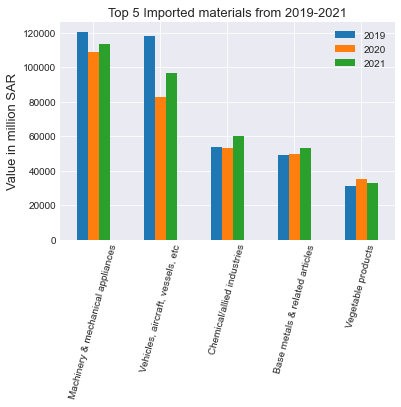

In [188]:
Im_data=Max5_Imports_18_21[[ '2019 Value(millions in SAR)', '2020 Value(millions in SAR)', '2021 Value(millions in SAR)']]
plt.figure(figsize=(50,100))
Im_data.plot(kind="bar")
plt.title("Top 5 Imported materials from 2019-2021", fontsize=13)
plt.xticks([0, 1, 2, 3, 4], ['Machinery & mechanical appliances', 'Vehicles, aircraft, vessels, etc', 'Chemical/allied industries',
'Base metals & related articles', 'Vegetable products'], rotation=75)
plt.legend(labels=( '2019', '2020', '2021'))
plt.ylabel("Value in million SAR", fontsize=13)
plt.savefig('Plots/Top 5 Imported materials from 2019-2021.png')
plt.show()